# Mission
Use SQL to answer buisness questions for a fictional music selling company called Chinook. The data is stored in the database file chinook.db. See figure 1-1 for the database file structure.

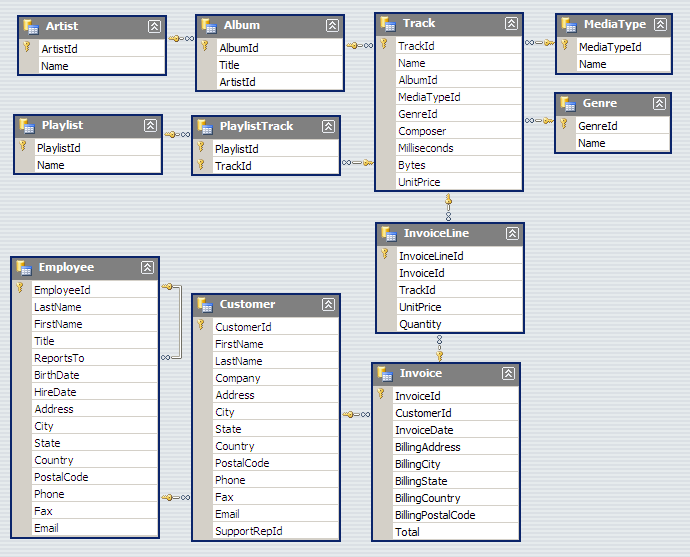

In [2]:
from IPython.display import Image
Image("chinook_db.png")

In [3]:
# Import modules
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Create function to run an sql query and return a dataframe
def run_query(q):
    with sqlite3.connect('chinook.db') as conn:
        return pd.read_sql(q, conn)

In [5]:
# Create function to execute sql commands
def run_command(c):
    with sqlite3.connect('chinook.db') as conn:
        conn.isolation_level = None
        conn.execute(c)

In [6]:
# Create function to view the tables in sql database
def show_tables():
    q = '''SELECT name, type 
           FROM sqlite_master 
           WHERE type IN ("table","view");'''
    return run_query(q)

In [7]:
show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


In [13]:
# Rank genres by tracks sold
tables = show_tables()
for i in tables.name:
    q = '''
    SELECT *
    FROM {}
    '''.format(i)
    returned = run_query(q)
    print(i, returned.shape)

album (347, 3)
artist (275, 2)
customer (59, 13)
employee (8, 15)
genre (25, 2)
invoice (614, 9)
invoice_line (4757, 5)
media_type (5, 2)
playlist (18, 2)
playlist_track (8715, 2)
track (3503, 9)


In [36]:
q = '''
SELECT AVG(total)
FROM invoice
'''
run_query(q)

,AVG(total)
0,7.670081


In [35]:
q = '''
SELECT AVG((i.total - sub.a) * (i.total - sub.a)) AS var 
FROM invoice i, (SELECT AVG(total) AS a FROM invoice) sub
'''
run_query(q)

,var
0,17.76291


In [38]:
std_dev_total = 17.76291**0.5
std_dev_total

4.214606743220535